## Logistic Regression - ROI Features

In [27]:
import numpy as np
import pickle
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [28]:
with open('HCP_movie_watching.pkl','rb') as f:
    TS = pickle.load(f)

testIndex = np.random.randint(0, 176, 76)

In [29]:
def splitData(tList):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for row in tList:
        if row[-1] in testIndex:
            X_test.append(row[:-2])
            y_test.append(row[-2])
        else:
            X_train.append(row[:-2])
            y_train.append(row[-2])

    X_train = np.array(X_train).astype(float)
    X_train = (X_train - np.mean(X_train)) / np.std(X_train)

    X_test = np.array(X_test).astype(float)
    X_test = (X_test - np.mean(X_test)) / np.std(X_test)
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return X_train, X_test, y_train, y_test
    

In [30]:
"""
def cost(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W))) # hypothesis representation
    cost = np.dot(Y, -np.log(h)) + np.dot((1-Y), np.log(1-h)) # cost function
    J = -1 / (len(X)) * np.sum(cost) # mean cost
    return J
def gradient(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W)))
    diff = h - Y
    grad = 1 / (len(X)) * np.dot(diff, X)
    return grad
def descent(X_train, Y_train, lr = 0.01):
    weights = [0]*(len(X_train[0]))
    loss = []
    loss.append(cost(X_train, Y_train, weights))
    count = 0
    while count < 1000:
        grad = gradient(X_train, Y_train, weights)
        weights = weights - lr*grad
        loss.append(cost(X_train, Y_train, weights))
        count += 1

    return weights

def createYMask(movie, Y):
    yMasked = np.zeros(Y.shape)
    mask = Y == movie
    yMasked[mask] = 1
    return yMasked

def sigmoid(X, W):
    return 1 / (1 + np.exp(-np.dot(X, W)))

def runModel(X_train, X_test, y_train, y_test):
    movieList = list(TS.keys())
    modelWeights = []
    for movie in movieList:
        yMasked = createYMask(movie, y_train)
        W = descent(X_train, yMasked)
        modelWeights.append(W)

    predY = []
    for x in X_test:
        probList = [sigmoid(x, W) for W in modelWeights]
        predY.append(movieList[probList.index(max(probList))])

    pMask = y_test == predY # create mask for values where predicted is correct
    acc = sum(pMask) / len(pMask)
    return acc
"""

'\ndef cost(X, Y, W):\n    h = 1 / (1 + np.exp(-np.dot(X, W))) # hypothesis representation\n    cost = np.dot(Y, -np.log(h)) + np.dot((1-Y), np.log(1-h)) # cost function\n    J = -1 / (len(X)) * np.sum(cost) # mean cost\n    return J\ndef gradient(X, Y, W):\n    h = 1 / (1 + np.exp(-np.dot(X, W)))\n    diff = h - Y\n    grad = 1 / (len(X)) * np.dot(diff, X)\n    return grad\ndef descent(X_train, Y_train, lr = 0.01):\n    weights = [0]*(len(X_train[0]))\n    loss = []\n    loss.append(cost(X_train, Y_train, weights))\n    count = 0\n    while count < 1000:\n        grad = gradient(X_train, Y_train, weights)\n        weights = weights - lr*grad\n        loss.append(cost(X_train, Y_train, weights))\n        count += 1\n\n    return weights\n\ndef createYMask(movie, Y):\n    yMasked = np.zeros(Y.shape)\n    mask = Y == movie\n    yMasked[mask] = 1\n    return yMasked\n\ndef sigmoid(X, W):\n    return 1 / (1 + np.exp(-np.dot(X, W)))\n\ndef runModel(X_train, X_test, y_train, y_test):\n    mo

In [31]:
performAcc = []

# Run log reg for first 90 time points
for k in range(90):

    # 2d arrays
    # Row: (subject, clip) combination
    # Column: ROIs at time point, movie clip, participant number
    #   - ROIs: features for model
    #   - movie clip: label
    #   - participant number: to split into test/train sets
    timepoints = []     
    for key, val in TS.items():
        if val.shape[-2] > k:
            if key == 'testretest':
                for i in range(val.shape[0]):
                    for j in range(val.shape[-3]):
                        subj = []
                        for l in range(val.shape[-1]):
                            subj.append(val[i][j][k][l])
                        subj.append(key)    # Add movie
                        subj.append(j)      # Add participant number
                        timepoints.append(subj)     # Add new row to array
            else:
                for j in range(val.shape[-3]):
                    subj = []
                    for l in range(val.shape[-1]):
                        subj.append(val[j][k][l])
                    subj.append(key)
                    subj.append(j)
                    timepoints.append(subj)
        
    X_train, X_test, y_train, y_test = splitData(timepoints)

    model = LogisticRegression(multi_class='ovr', max_iter = 1000)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    #acc = runModel(X_train, X_test, y_train, y_test)
    performAcc.append(acc)


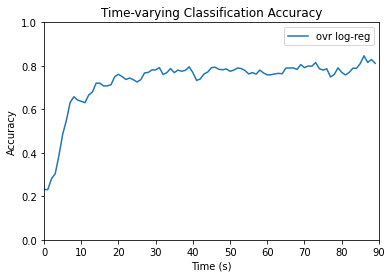

In [32]:
xAx = [i for i in range(0,90)]
plt.plot(xAx, performAcc, label="ovr log-reg")
plt.xlabel("Time (s)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xlim(0,90)
plt.title("Time-varying Classification Accuracy")
plt.legend()
plt.show()